In [7]:
import pandas as pd

In [8]:
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")
valid = pd.read_csv("../data/valid.csv")

In [11]:
X_train, y_train = train.drop(["Chronic Medical Conditions", "Income"], axis=1), train["Chronic Medical Conditions"]

In [13]:
X_valid, y_valid = valid.drop(["Chronic Medical Conditions", "Income"], axis=1), valid["Chronic Medical Conditions"]
X_test, y_test = train.drop(["Chronic Medical Conditions", "Income"], axis=1), test["Chronic Medical Conditions"]

In [14]:
from sklearn.linear_model import LogisticRegression

# Without penalty

In [15]:
lr = LogisticRegression(penalty=None, max_iter=10_000, n_jobs=-1, random_state=42)

In [16]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, random_state=42)

In [17]:
y_pred_valid = lr.predict(X_valid)

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

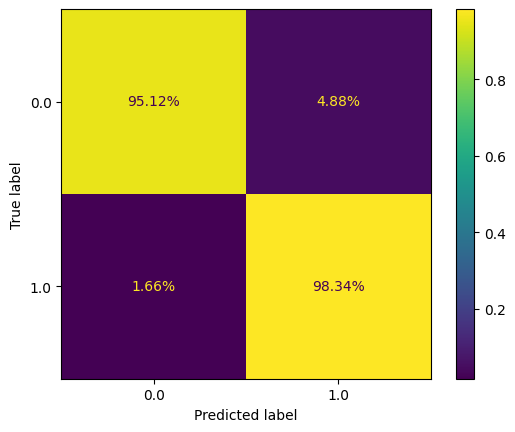

In [29]:
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [24]:
lr.coef_

array([[ 1.52195031e+01, -4.85464605e-01, -3.12260510e+00,
         2.46818479e-01,  1.52888104e-01, -7.60819886e-02,
        -4.73112707e-01,  1.96669852e-02,  9.52298772e-01,
        -3.71531809e-01,  1.39705242e-02]])

In [26]:
X_train.head()

,Income_log,Age,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness
0,0.064693,1.707128,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-0.585799,-0.385529,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0
2,0.166204,-1.597067,1.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0
3,-0.165435,1.321639,1.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0
4,1.047952,0.440520,2.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,0.0


In [30]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# With L1 penalty

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


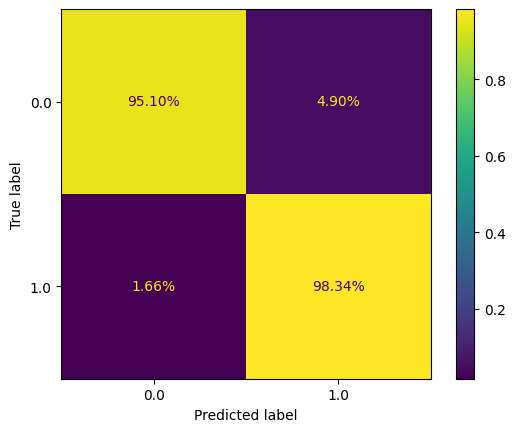

In [34]:
lr = LogisticRegression(penalty="l1", max_iter=10_000, n_jobs=-1, random_state=42, solver="liblinear")
lr.fit(X_train, y_train)
y_pred_valid = lr.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [35]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# With L2 penalty

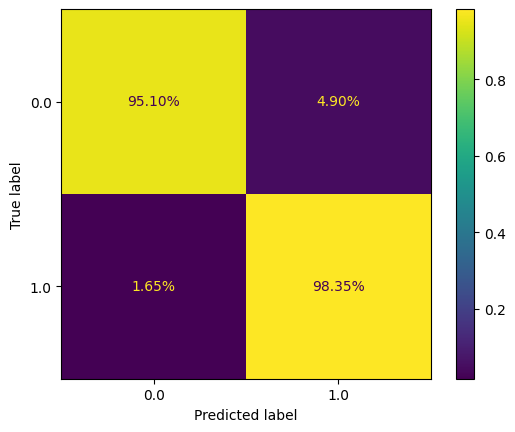

In [36]:
lr = LogisticRegression(penalty="l2", max_iter=10_000, n_jobs=-1, random_state=42)
lr.fit(X_train, y_train)
y_pred_valid = lr.predict(X_valid)
ConfusionMatrixDisplay.from_predictions(y_true=y_valid, y_pred=y_pred_valid, normalize="true", values_format=".2%")

In [37]:
print(classification_report(y_true=y_valid, y_pred=y_pred_valid))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     29622
         1.0       0.97      0.98      0.98     53132

    accuracy                           0.97     82754
   macro avg       0.97      0.97      0.97     82754
weighted avg       0.97      0.97      0.97     82754



# Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        "penalty" : [None, "l2"],
        "solver" : ["lbfgs", "newton", "newton-cholesky", "sag", "saga"]
    }
)